# Time Series forecasting

##  European Commission SETIS: Wind power generation

<img src="https://setis.ec.europa.eu/sites/default/files/styles/large/public/report_graphs/wind_power_forecast_0.png?itok=yAL6usDc" />

##  Loading and Handling Time Series

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [13]:
#Importing data
df = pd.read_excel('/home/chaudharyubuntu/Downloads/EMHIRES_WIND_COUNTRY_June2019.xlsx')
#Printing head
df.head()

,Time_step,Date,Year,Month,Day,Hour,AL,AT,BE,BG,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
0,1,1986-01-01,1986,1,1,0,0.3685,0.06084,0.25200,0.23762,...,0.40628,0.26292,0.12015,0.22683,0.05124,0.25050,0.17086,0.67720,0.05715,0.268794
1,2,1986-01-01,1986,1,1,1,0.3235,0.05282,0.23841,0.23842,...,0.39115,0.26376,0.11985,0.25821,0.04665,0.24625,0.15909,0.66776,0.05218,0.270761
2,3,1986-01-01,1986,1,1,2,0.2735,0.04276,0.22110,0.23033,...,0.36163,0.26695,0.12113,0.27921,0.04543,0.23250,0.15296,0.65904,0.03905,0.265209
3,4,1986-01-01,1986,1,1,3,0.2600,0.02914,0.21491,0.24158,...,0.35170,0.27101,0.11858,0.33106,0.04455,0.20525,0.15328,0.58460,0.02130,0.257709
4,5,1986-01-01,1986,1,1,4,0.2530,0.01780,0.20304,0.26168,...,0.36168,0.28097,0.11101,0.38668,0.05438,0.20075,0.15013,0.46732,0.01029,0.247726


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 42 columns):
Time_step    262968 non-null int64
Date         262968 non-null datetime64[ns]
Year         262968 non-null int64
Month        262968 non-null int64
Day          262968 non-null int64
Hour         262968 non-null int64
AL           262968 non-null float64
AT           262968 non-null float64
BE           262968 non-null float64
BG           262968 non-null float64
BA           262968 non-null float64
CH           262968 non-null float64
CY           262968 non-null float64
CZ           262968 non-null float64
DE           262968 non-null float64
DK           262968 non-null float64
EE           262968 non-null float64
EL           262968 non-null float64
ES           262968 non-null float64
FI           262968 non-null float64
FR           262968 non-null float64
HR           262968 non-null float64
HU           262968 non-null float64
XK           262968 non-null float64
IE  

In [15]:
df['Date']

0        1986-01-01
1        1986-01-01
2        1986-01-01
3        1986-01-01
4        1986-01-01
            ...    
262963   2015-12-31
262964   2015-12-31
262965   2015-12-31
262966   2015-12-31
262967   2015-12-31
Name: Date, Length: 262968, dtype: datetime64[ns]

In [16]:
df['Hour']

0          0
1          1
2          2
3          3
4          4
          ..
262963    19
262964    20
262965    21
262966    22
262967    23
Name: Hour, Length: 262968, dtype: int64

In [17]:
df.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [18]:
df['Hour'].replace([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23],["00:00","01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00","09:00","10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00",
       "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"],inplace=True)

In [19]:
df['Hour']

0         00:00
1         01:00
2         02:00
3         03:00
4         04:00
          ...  
262963    19:00
262964    20:00
262965    21:00
262966    22:00
262967    23:00
Name: Hour, Length: 262968, dtype: object

In [20]:
today = pd.to_datetime('today')
print(today)

2019-12-17 16:40:23.131714


In [21]:
from datetime import timedelta
today = pd.to_datetime('today')
ghanta = today + timedelta(hours = -14)
print(ghanta)

2019-12-17 02:40:23.211532


In [22]:
DateTime = df["Date"].astype(str) +" "+ df["Hour"].astype(str)

In [23]:
DateTime

0         1986-01-01 00:00
1         1986-01-01 01:00
2         1986-01-01 02:00
3         1986-01-01 03:00
4         1986-01-01 04:00
                ...       
262963    2015-12-31 19:00
262964    2015-12-31 20:00
262965    2015-12-31 21:00
262966    2015-12-31 22:00
262967    2015-12-31 23:00
Length: 262968, dtype: object

In [24]:
France = df['FR']

In [25]:
France

0         0.17573
1         0.16771
2         0.15877
3         0.14818
4         0.13631
           ...   
262963    0.31216
262964    0.28370
262965    0.25090
262966    0.21519
262967    0.17319
Name: FR, Length: 262968, dtype: float64

In [26]:
Country = pd.DataFrame(France)

In [27]:
Country

,FR
0,0.17573
1,0.16771
2,0.15877
3,0.14818
4,0.13631
...,...
262963,0.31216
262964,0.28370
262965,0.25090
262966,0.21519


In [28]:
TimeSeries= pd.DataFrame(DateTime,columns=['DateTime'] )

In [29]:
TimeSeries

,DateTime
0,1986-01-01 00:00
1,1986-01-01 01:00
2,1986-01-01 02:00
3,1986-01-01 03:00
4,1986-01-01 04:00
...,...
262963,2015-12-31 19:00
262964,2015-12-31 20:00
262965,2015-12-31 21:00
262966,2015-12-31 22:00


In [30]:
data = pd.concat([TimeSeries, Country], axis=1)

In [31]:
data

,DateTime,FR
0,1986-01-01 00:00,0.17573
1,1986-01-01 01:00,0.16771
2,1986-01-01 02:00,0.15877
3,1986-01-01 03:00,0.14818
4,1986-01-01 04:00,0.13631
...,...,...
262963,2015-12-31 19:00,0.31216
262964,2015-12-31 20:00,0.28370
262965,2015-12-31 21:00,0.25090
262966,2015-12-31 22:00,0.21519


In [32]:
data=pd.DataFrame.from_dict(data)

In [33]:
data.DateTime = pd.to_datetime(data.DateTime)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 2 columns):
DateTime    262968 non-null datetime64[ns]
FR          262968 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 MB


In [35]:
data

,DateTime,FR
0,1986-01-01 00:00:00,0.17573
1,1986-01-01 01:00:00,0.16771
2,1986-01-01 02:00:00,0.15877
3,1986-01-01 03:00:00,0.14818
4,1986-01-01 04:00:00,0.13631
...,...,...
262963,2015-12-31 19:00:00,0.31216
262964,2015-12-31 20:00:00,0.28370
262965,2015-12-31 21:00:00,0.25090
262966,2015-12-31 22:00:00,0.21519


In [36]:
#Creating train and test set 

train=data[0:1000] 
test=data[1000:1200]

In [37]:
train

,DateTime,FR
0,1986-01-01 00:00:00,0.17573
1,1986-01-01 01:00:00,0.16771
2,1986-01-01 02:00:00,0.15877
3,1986-01-01 03:00:00,0.14818
4,1986-01-01 04:00:00,0.13631
...,...,...
995,1986-02-11 11:00:00,0.20571
996,1986-02-11 12:00:00,0.21805
997,1986-02-11 13:00:00,0.24045
998,1986-02-11 14:00:00,0.26355


In [38]:
data.Timestamp = pd.to_datetime(data.DateTime,format='%H:%M %d-%m-%Y') 
data.index = data.Timestamp 
data = data.resample('H').mean()
train.Timestamp = pd.to_datetime(train.DateTime,format='%H:%M %d-%m-%Y') 
train.index = train.Timestamp 
train = train.resample('H').mean() 
test.Timestamp = pd.to_datetime(test.DateTime,format='%H:%M %d-%m-%Y') 
test.index = test.Timestamp 
test = test.resample('H').mean()

/home/chaudharyubuntu/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/home/chaudharyubuntu/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/home/chaudharyubuntu/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


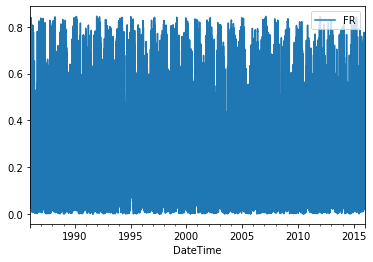

In [39]:
import matplotlib.pyplot as plt
data.plot()

In [40]:
train.index

DatetimeIndex(['1986-01-01 00:00:00', '1986-01-01 01:00:00',
               '1986-01-01 02:00:00', '1986-01-01 03:00:00',
               '1986-01-01 04:00:00', '1986-01-01 05:00:00',
               '1986-01-01 06:00:00', '1986-01-01 07:00:00',
               '1986-01-01 08:00:00', '1986-01-01 09:00:00',
               ...
               '1986-02-11 06:00:00', '1986-02-11 07:00:00',
               '1986-02-11 08:00:00', '1986-02-11 09:00:00',
               '1986-02-11 10:00:00', '1986-02-11 11:00:00',
               '1986-02-11 12:00:00', '1986-02-11 13:00:00',
               '1986-02-11 14:00:00', '1986-02-11 15:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=1000, freq='H')

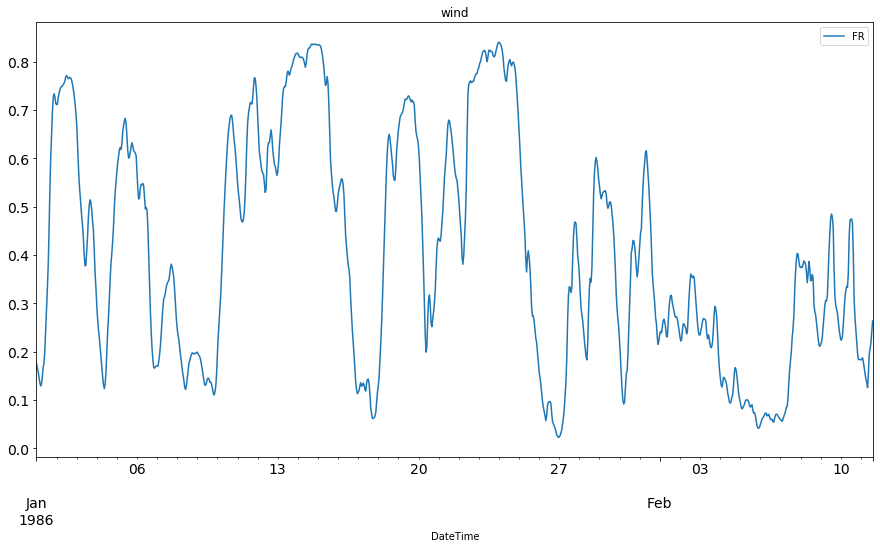

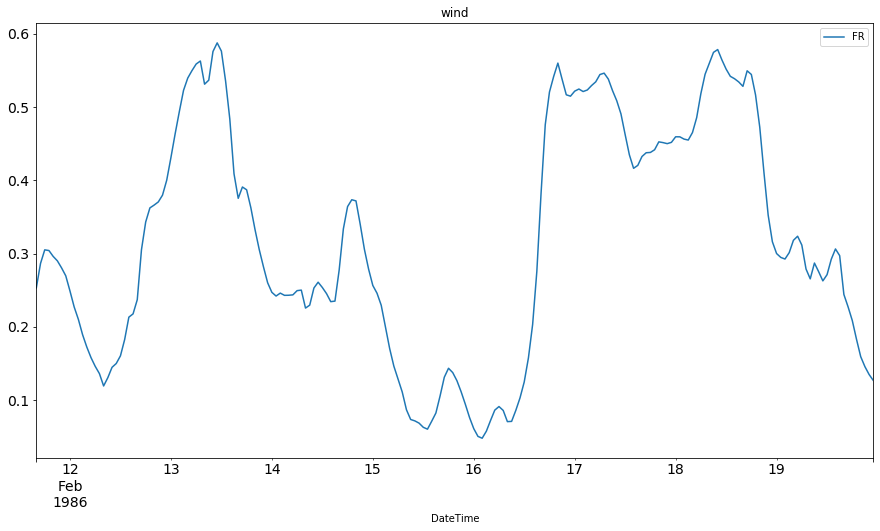

In [41]:
#Plotting data
train.plot(figsize=(15,8), title= 'wind', fontsize=14)
test.plot(figsize=(15,8), title= 'wind', fontsize=14)
plt.show()

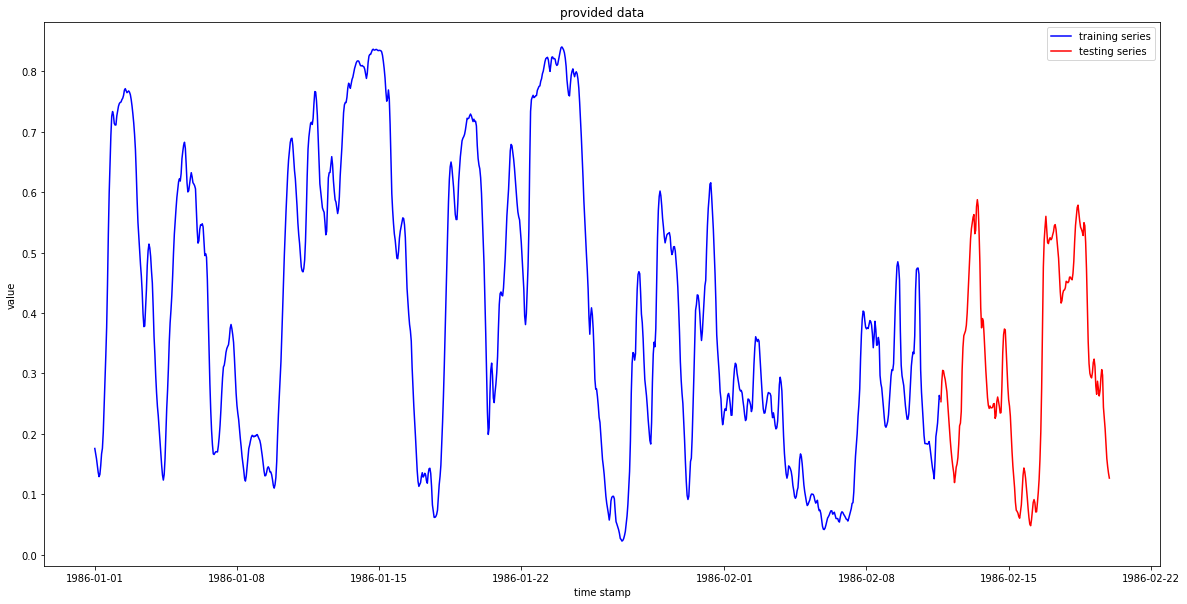

In [42]:
fig = plt.figure(figsize=(20,10))
plt.plot( train.index,train.FR, 'blue', label= 'training series')
plt.plot( test.index,test.FR, 'red',label = 'testing series')

#plt.style.use('ggplot')
plt.title('provided data')
plt.xlabel('time stamp')
plt.ylabel('value')
plt.legend()
plt.show()

# Simple Average

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.45.10-PM-300x82.png" \>

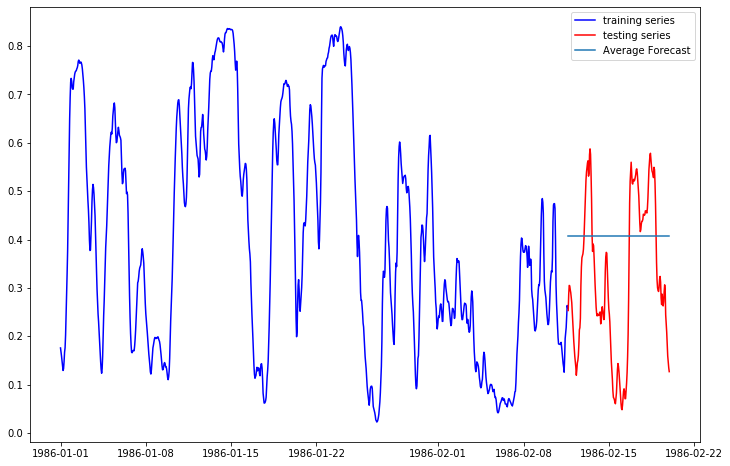

In [43]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['FR'].mean()
plt.figure(figsize=(12,8))
plt.plot( train.index,train.FR, 'blue', label= 'training series')
plt.plot( test.index,test.FR, 'red',label = 'testing series')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

#  Naive Forecast

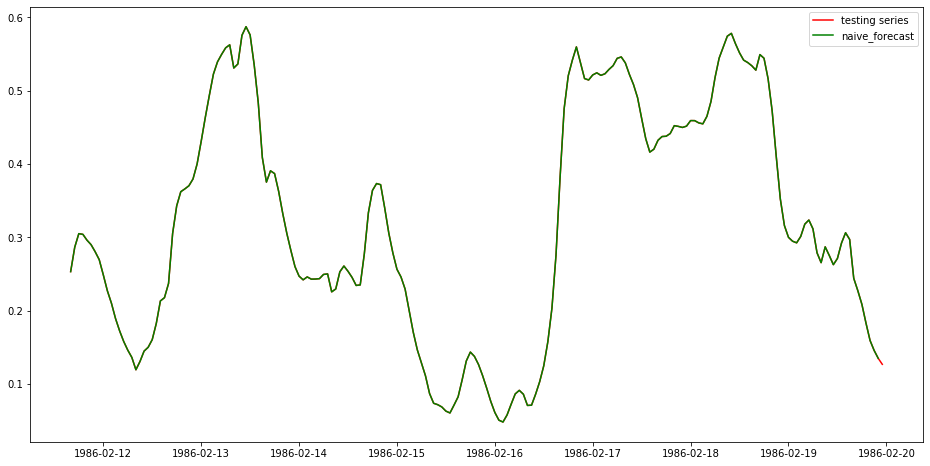

In [44]:
y_hat_avg = test.copy()
y_hat_avg['naive_forecast'] = data[999:1199]
plt.figure(figsize=(16,8))
#plt.plot( train.index,train.FR, 'blue', label= 'training series')
plt.plot( test.index,test.FR, 'red',label = 'testing series')
plt.plot(y_hat_avg['naive_forecast'],'green' , label='naive_forecast')
plt.legend(loc='best')
plt.show()

# Moving Average Forecast

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.47.33-PM.png" \>

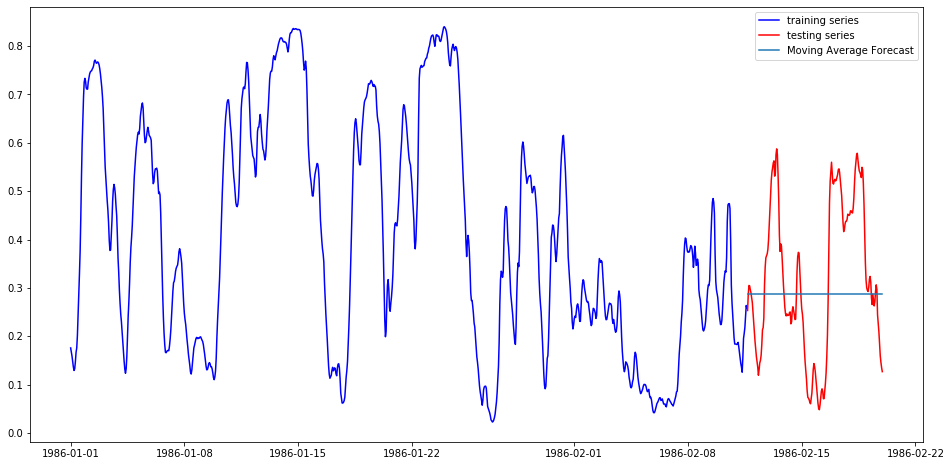

In [45]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['FR'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot( train.index,train.FR, 'blue', label= 'training series')
plt.plot( test.index,test.FR, 'red',label = 'testing series')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test.FR, y_hat_avg.moving_avg_forecast))
print(rms)

0.16216278066758855


In [47]:
print(rms*1000)

162.16278066758855


# Simple Exponential Smoothing

 Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.59.27-PM-768x90.png" \>

/home/chaudharyubuntu/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


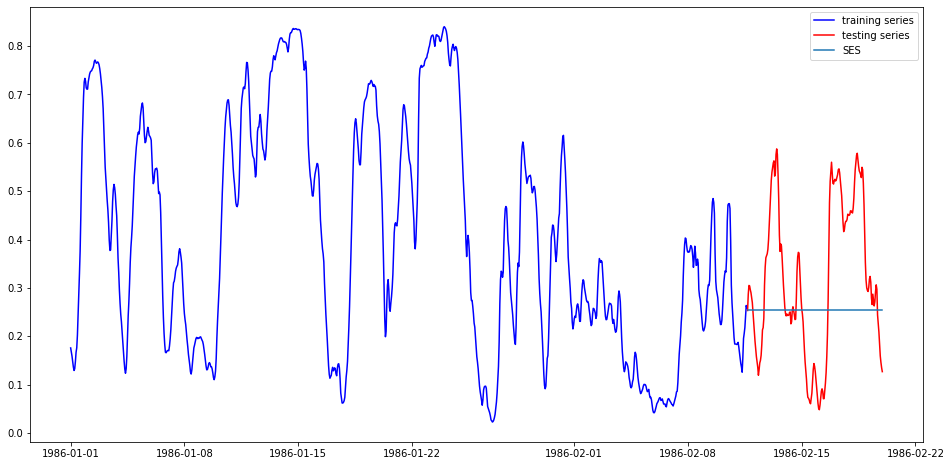

In [48]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['FR'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train.index,train.FR, 'blue', label= 'training series')
plt.plot( test.index,test.FR, 'red',label = 'testing series')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [49]:
rms = np.sqrt(mean_squared_error(test.FR, y_hat_avg.SES))
print(rms)

0.17182341594242526


In [50]:
print(rms*1000)

171.82341594242524


# Holt’s Linear Trend method

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/eq-768x317.png" \>

Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend. To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ

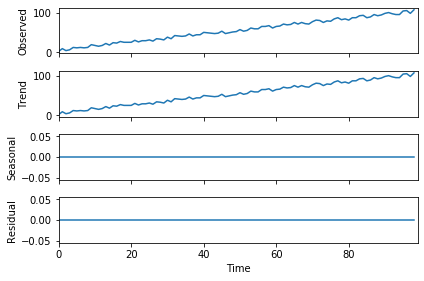

In [51]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

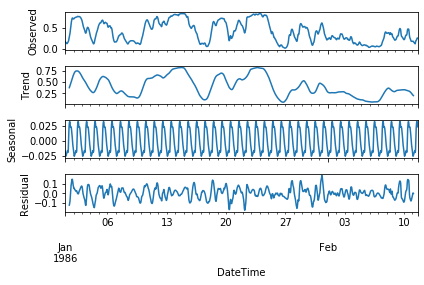

In [52]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['FR']).plot()
result = sm.tsa.stattools.adfuller(train.FR)
plt.show()

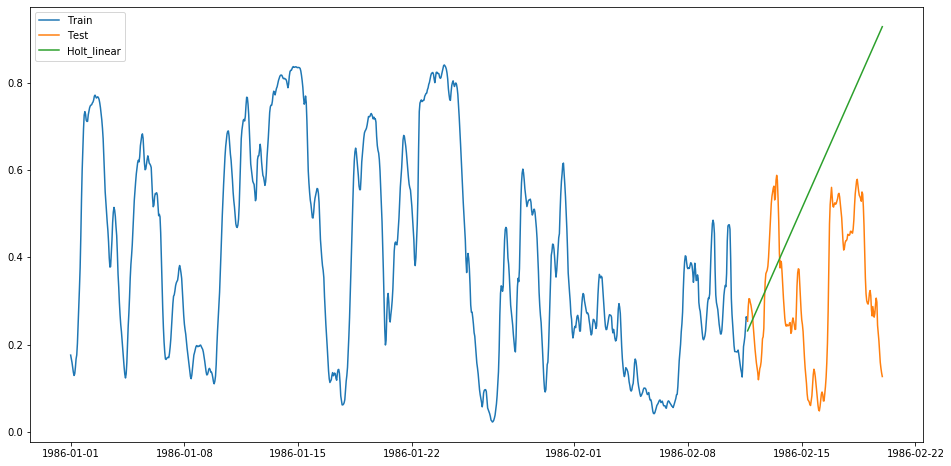

In [53]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['FR'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['FR'], label='Train')
plt.plot(test['FR'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [54]:
rms = np.sqrt(mean_squared_error(test.FR, y_hat_avg.Holt_linear))
print(rms)

0.3488263508480129


# Holt-Winters Method

The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.
Using Holt’s winter method will be the best option among the rest of the models beacuse of the seasonality factor. The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/eq.png" \>

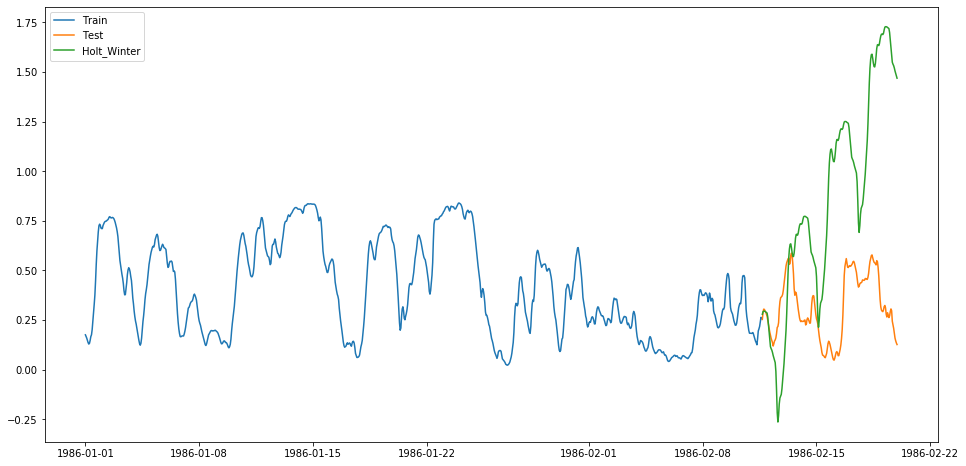

In [55]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['FR']) ,seasonal_periods=60 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['FR'], label='Train')
plt.plot(test['FR'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

# Autoregressive Integrated Moving average

 ### Seasonal ARIMA

/home/chaudharyubuntu/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/base/model.py:507: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


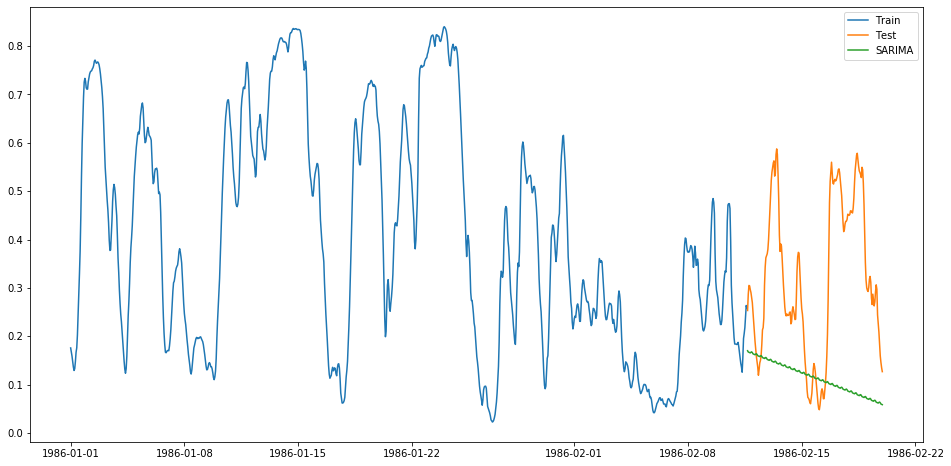

In [56]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.FR, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="1986-02-11 00:00:00", end="1986-02-20  00:00:00", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['FR'], label='Train')
plt.plot(test['FR'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [57]:
There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

SyntaxError: invalid syntax (<ipython-input-57-8ac8913f5ef3>, line 1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(16,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
test_stationarity(train['FR'])

the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

In [ ]:
train['FR'].rolling(12).mean()

In [ ]:
train['FR'].rolling(12).std()

In [ ]:
ts_log = np.log(train['FR'])
plt.figure(figsize=(16,8))
plt.plot(ts_log)

In [ ]:
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(16,8))
plt.plot(ts_log,color="blue")
plt.plot(moving_avg, color='red')

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
ExponentiallyWeightedMovingAverage= ts_log.ewm(span=20).mean()

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(ts_log,color="blue")
plt.plot(ExponentiallyWeightedMovingAverage, color='red')

In [ ]:
ts_log_ewma_diff = ts_log - ExponentiallyWeightedMovingAverage
test_stationarity(ts_log_ewma_diff)

####  Lets discuss two ways of removing trend and seasonality:

Differencing – taking the differece with a particular time lag
Decomposition – modeling both trend and seasonality and removing them from the model.

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

## Decomposing

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

---Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
---Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
---Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

--Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
--Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

In [ ]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Auto-Regressive Model

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# Moving Average Model

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# Combined Model

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

## Taking it back to original scale

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(18,10))
plt.plot(train.FR)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-train.FR)**2)/len(train.FR)))